## Importing necessary libraries

In [6]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Import the Prophet model from Facebook that will be used to predict the price in the future
from prophet import Prophet
%matplotlib inline

### The forecasting model: Facebook’s Prophet

#### The most commonly used models for forecasting predictions are the autoregressive models. Briefly, the autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term).
#### Recently, in an attempt to develop a model that could capture seasonality in time-series data, Facebook developed the famous Prophet model that is publicly available for everyone. In this article, we will use this state-of-the-art model: the Prophet model. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models.
#### The mathematical equation behind the Prophet model is defined as:
### y(t) = g(t) + s(t) + h(t) + e(t)
#### with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.
#### s(t) represents periodic changes (weekly, monthly, yearly).
#### h(t) represents the effects of holidays (recall: Holidays impact businesses).
#### e(t) is the error term.
#### The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

## 1. Load the data from using API connection and prepare it for our purpose

In [12]:
source = 'https://min-api.cryptocompare.com/data/v2/histoday'
res = requests.get(source + '?fsym=BTC&tsym=USD&limit=1500')
history = pd.DataFrame(json.loads(res.content)['Data']['Data']) # Select the Data column in the Array that is inside an Object called data
history = history.set_index('time')
history.index = pd.to_datetime(history.index, unit='s') # The data that we are going to use is stored in the variable history1

# We need the Time column in the dataset so we do
history.reset_index(inplace = True)

# Select only the important features i.e. the date and closing price from the DF
history = history[["time","close"]]
# Rename the features: "time" into "ds" and "close" into "y"
history = history.rename(columns = {"time":"ds","close":"y"})

## 2. Build the Prophet model

In [13]:
model = Prophet(daily_seasonality = True) # the Prophet class (model)
model.fit(history) # fit the model using all data in the data frame

## 3. Use the model to predict the price for the next x days

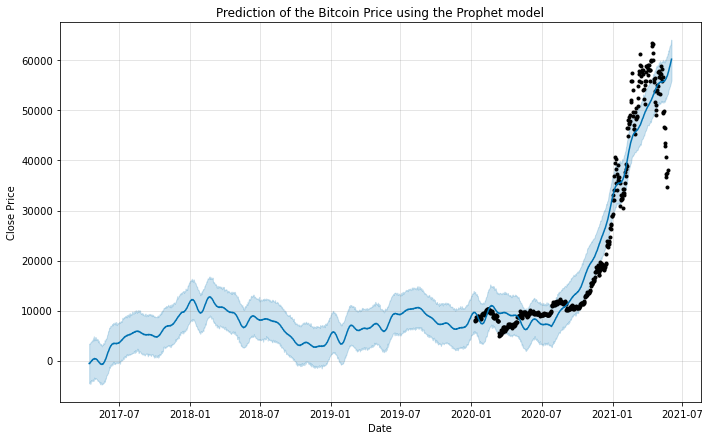

In [14]:
#we need to specify the number of days in future in our case lets use 10 days
days = model.make_future_dataframe(periods=10) 
price_prediction = model.predict(days)
m.plot(price_prediction)

# lets Plot the predictions in a graph
plt.title("Prediction of the Bitcoin Price using the Prophet model")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [11]:
# Kets see the last 20 days that were predict ed by the prophet algorithm
prediction.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
491,2021-05-15,56023.811179,51436.881035,60920.974985,56023.811179,56023.811179,43.432822,43.432822,43.432822,-15.143639,-15.143639,-15.143639,58.576461,58.576461,58.576461,0.0,0.0,0.0,56067.244001
492,2021-05-16,56129.412888,51326.001379,60823.278944,56129.412888,56129.412888,-212.628901,-212.628901,-212.628901,-15.143639,-15.143639,-15.143639,-197.485261,-197.485261,-197.485261,0.0,0.0,0.0,55916.783987
493,2021-05-17,56235.014596,51289.667852,61111.821709,56235.014596,56235.014596,-142.590264,-142.590264,-142.590264,-15.143639,-15.143639,-15.143639,-127.446625,-127.446625,-127.446625,0.0,0.0,0.0,56092.424332
494,2021-05-18,56340.616305,51467.779601,61143.286338,56340.616305,56340.616305,112.757681,112.757681,112.757681,-15.143639,-15.143639,-15.143639,127.901320,127.901320,127.901320,0.0,0.0,0.0,56453.373986
495,2021-05-19,56446.218014,52029.515777,61439.567191,56446.218014,56446.218014,46.998852,46.998852,46.998852,-15.143639,-15.143639,-15.143639,62.142491,62.142491,62.142491,0.0,0.0,0.0,56493.216865
496,2021-05-20,56551.819722,51784.178648,61654.030540,56551.819722,56551.819722,-6.394478,-6.394478,-6.394478,-15.143639,-15.143639,-15.143639,8.749161,8.749161,8.749161,0.0,0.0,0.0,56545.425244
497,2021-05-21,56657.421431,51859.581425,61520.786737,56657.421431,56657.421431,52.418813,52.418813,52.418813,-15.143639,-15.143639,-15.143639,67.562453,67.562453,67.562453,0.0,0.0,0.0,56709.840244
498,2021-05-22,56763.023139,51824.553912,61680.188161,56763.023139,56763.023139,43.432822,43.432822,43.432822,-15.143639,-15.143639,-15.143639,58.576461,58.576461,58.576461,0.0,0.0,0.0,56806.455961
499,2021-05-23,56868.624848,51644.812388,61636.961160,56868.624848,56868.624848,-212.628901,-212.628901,-212.628901,-15.143639,-15.143639,-15.143639,-197.485261,-197.485261,-197.485261,0.0,0.0,0.0,56655.995947
500,2021-05-24,56974.226556,51986.376712,61715.708914,56974.226556,56974.226556,-142.590264,-142.590264,-142.590264,-15.143639,-15.143639,-15.143639,-127.446625,-127.446625,-127.446625,0.0,0.0,0.0,56831.636292


From the graph above we can see that the prophet algorithm does not predict well the price of Bitcoin. This can be seen since the black dots are the real values that we have loaded from the dataset and the blue line is the predicted value.
This is because the price of Bitcoin is very volatile and it is difficult to predict the direction of the price.